In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# load data
X_1 = np.loadtxt('class1_train.txt')
X_2 = np.loadtxt('class2_train.txt')
X_3 = np.loadtxt('class3_train.txt')
X_4 = np.loadtxt('class4_train.txt')
X_1_val = np.loadtxt('class1_val.txt')
X_2_val = np.loadtxt('class2_val.txt')
X_3_val = np.loadtxt('class3_val.txt')
X_4_val = np.loadtxt('class4_val.txt')
X_1_test = np.loadtxt('class1_test.txt')
X_2_test = np.loadtxt('class2_test.txt')
X_3_test = np.loadtxt('class3_test.txt')
X_4_test = np.loadtxt('class4_test.txt')

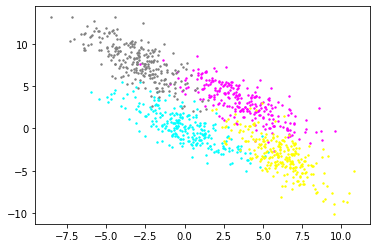

In [10]:
# simply visualising data
plt.scatter(X_1[:, 0], X_1[:, 1], color = 'cyan', s = 2)
plt.scatter(X_2[:, 0], X_2[:, 1], color = 'magenta', s = 2)
plt.scatter(X_3[:, 0], X_3[:, 1], color = 'yellow', s = 2)
plt.scatter(X_4[:, 0], X_4[:, 1], color = 'grey', s = 2)

In [11]:
# find parameters
u_1 = np.mean(X_1, axis = 0)
u_2 = np.mean(X_2, axis = 0)
u_3 = np.mean(X_3, axis = 0)
u_4 = np.mean(X_4, axis = 0)
s_1 = np.mean(np.cov(X_1.T))
s_2 = np.mean(np.cov(X_2.T))
s_3 = np.mean(np.cov(X_3.T))
s_4 = np.mean(np.cov(X_4.T))
s = np.mean([s_1, s_2, s_3, s_4])
pc_1 = X_1.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0]+X_4.shape[0])
pc_2 = X_2.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0]+X_4.shape[0])
pc_3 = X_3.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0]+X_4.shape[0])
pc_4 = X_4.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0]+X_4.shape[0])

In [12]:
# define functions g1, g2, g3
def g1(x):
    w1 = u_1/s
    w0 = -np.dot(u_1.T, u_1)/(2*s) + np.log(pc_1)
    return np.dot(w1.T, x)+w0
def g2(x):
    w1 = u_2/s
    w0 = -np.dot(u_2.T, u_2)/(2*s) + np.log(pc_2)
    return np.dot(w1.T, x)+w0
def g3(x):
    w1 = u_3/s
    w0 = -np.dot(u_3.T, u_3)/(2*s) + np.log(pc_3)
    return np.dot(w1.T, x)+w0
def g4(x):
    w1 = u_4/s
    w0 = -np.dot(u_4.T, u_4)/(2*s) + np.log(pc_4)
    return np.dot(w1.T, x)+w0

In [13]:
# classifier
def predict(x):
    return np.argmax([g1(x), g2(x), g3(x), g4(x)])

In [14]:
# confusion matrix
# rows: predicted classes, columns: true classes
ConfusionMatrix = np.zeros((4, 4))
X = [X_1_test, X_2_test, X_3_test, X_4_test]
for i in range(4):
    for x in X[i]:
        ConfusionMatrix[predict(x), i] = ConfusionMatrix[predict(x), i]+1
pd.DataFrame(ConfusionMatrix, ['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'],['True 1', 'True 2', 'True 3', 'True 4'])

,True 1,True 2,True 3,True 4
Predicted 1,85.0,0.0,4.0,6.0
Predicted 2,0.0,89.0,7.0,0.0
Predicted 3,12.0,5.0,89.0,0.0
Predicted 4,3.0,6.0,0.0,94.0


In [15]:
# performance measures
N = np.sum(ConfusionMatrix, axis = 0)
TP = np.diagonal(ConfusionMatrix)
TN = np.sum(TP)-TP
FP = np.sum(ConfusionMatrix, axis = 1)-TP
FN = np.sum(ConfusionMatrix, axis = 0)-TP
Accuracy = 100*TP/N
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_measure = 2*Precision*Recall/(Precision+Recall)
print({
    'Accuracy: ': Accuracy.tolist(),
    'Mean Accuracy': np.mean(Accuracy)
})
print({
    'Precision: ': Precision.tolist(),
    'Mean Precision': np.mean(Precision)
})
print({
    'Recall: ': Recall.tolist(),
    'Mean Recall': np.mean(Recall)
})
print({
    'F_measure: ': F_measure.tolist(),
    'Mean F_measure': np.mean(F_measure)
})

{'Accuracy: ': [85.0, 89.0, 89.0, 94.0], 'Mean Accuracy': 89.25}
{'Precision: ': [0.8947368421052632, 0.9270833333333334, 0.839622641509434, 0.912621359223301], 'Mean Precision': 0.8935160440428329}
{'Recall: ': [0.85, 0.89, 0.89, 0.94], 'Mean Recall': 0.8925}
{'F_measure: ': [0.8717948717948718, 0.9081632653061226, 0.8640776699029127, 0.9261083743842364], 'Mean F_measure': 0.8925360453470359}


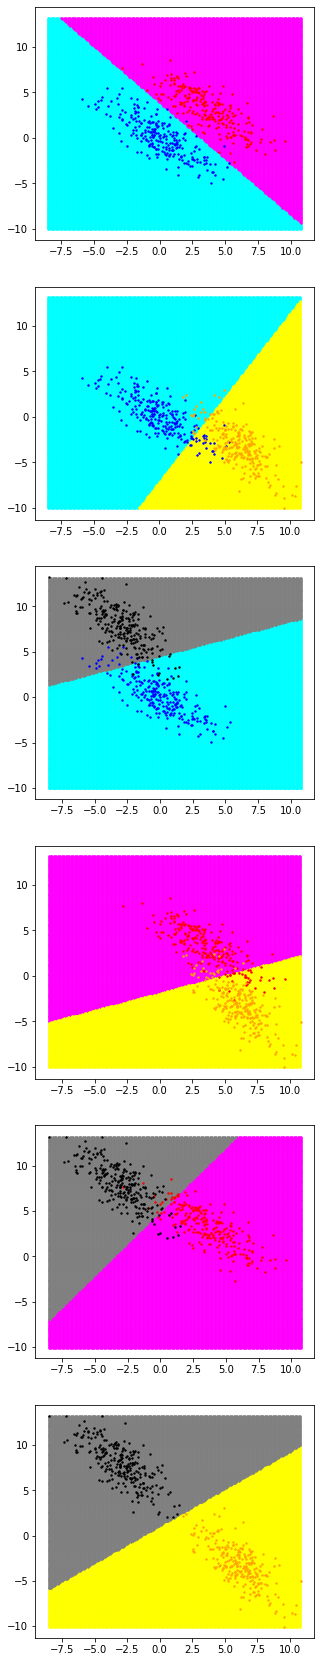

In [16]:
# decision region plot for every pair of classes with the respective training data superimposed
plt.rcParams['figure.figsize'] = [5, 30]
fig, axs = plt.subplots(6, 1)
x_min = min([min(X_1[:, 0]), min(X_2[:, 0]), min(X_3[:, 0]), min(X_4[:, 0])])
y_min = min([min(X_1[:, 1]), min(X_2[:, 1]), min(X_3[:, 1]), max(X_4[:, 1])])
x_max = max([max(X_1[:, 0]), max(X_2[:, 0]), max(X_3[:, 0]), min(X_4[:, 0])])
y_max = max([max(X_1[:, 1]), max(X_2[:, 1]), max(X_3[:, 1]), max(X_4[:, 1])])

# class 1 v class 2
x_1 = []
x_2 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = np.argmax([g1([x, y]), g2([x, y])])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
axs[0].scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
axs[0].scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
axs[0].scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
axs[0].scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)

# class 1 v class 3
x_1 = []
x_3 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = np.argmax([g1([x, y]), g3([x, y])])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_3.append([x, y])
x_1 = np.array(x_1)
x_3 = np.array(x_3)
axs[1].scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
axs[1].scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
axs[1].scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
axs[1].scatter(X_3[:, 0], X_3[:, 1], color = 'orange', s = 2)

# class 1 v class 4
x_1 = []
x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = np.argmax([g1([x, y]), g4([x, y])])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_4.append([x, y])
x_1 = np.array(x_1)
x_4 = np.array(x_4)
axs[2].scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
axs[2].scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 2)
axs[2].scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
axs[2].scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)

# class 2 v class 3
x_2 = []
x_3 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = np.argmax([g2([x, y]), g3([x, y])])
        if c == 0:
            x_2.append([x, y])
        elif c == 1:
            x_3.append([x, y])
x_2 = np.array(x_2)
x_3 = np.array(x_3)
axs[3].scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
axs[3].scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
axs[3].scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
axs[3].scatter(X_3[:, 0], X_3[:, 1], color = 'orange', s = 2)

# class 2 v class 4
x_2 = []
x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = np.argmax([g2([x, y]), g4([x, y])])
        if c == 0:
            x_2.append([x, y])
        elif c == 1:
            x_4.append([x, y])
x_2 = np.array(x_2)
x_4 = np.array(x_4)
axs[4].scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
axs[4].scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 2)
axs[4].scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
axs[4].scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)

# class 2 v class 4
x_3 = []
x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = np.argmax([g3([x, y]), g4([x, y])])
        if c == 0:
            x_3.append([x, y])
        elif c == 1:
            x_4.append([x, y])
x_3 = np.array(x_3)
x_4 = np.array(x_4)
axs[5].scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
axs[5].scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 2)
axs[5].scatter(X_3[:, 0], X_3[:, 1], color = 'orange', s = 2)
axs[5].scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)


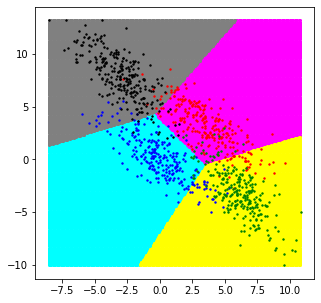

In [17]:
# Decision region plot for all the classes together with the training data superposed
plt.rcParams['figure.figsize'] = [5, 5]
x_1 = []
x_2 = []
x_3 = []
x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = predict([x, y])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
        elif c == 2:
            x_3.append([x, y])
        else:
            x_4.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_3 = np.array(x_3)
x_4 = np.array(x_4)
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 4)
plt.scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 4)
plt.scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 4)
plt.scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 4)
plt.scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
plt.scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
plt.scatter(X_3[:, 0], X_3[:, 1], color = 'green', s = 2)
plt.scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)